--2023-02-08 21:36:43--  https://github.com/knave88/Face_detection/raw/main/lena.png
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/knave88/Face_detection/main/lena.png [following]
--2023-02-08 21:36:44--  https://raw.githubusercontent.com/knave88/Face_detection/main/lena.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 473831 (463K) [image/png]
Saving to: ‘lena.png’

lena.png            100%[===================>] 462.73K  --.-KB/s    in 0.01s   

2023-02-08 21:36:44 (31.4 MB/s) - ‘lena.png’ saved [473831/473831]



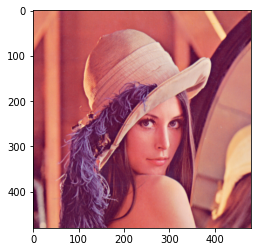

In [55]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

!wget 'https://github.com/knave88/Face_detection/raw/main/lena.png' -O lena.png
	
#reading the image
input_image = cv2.imread('lena.png')

input_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)
#resizing the image according to our need
# resize() function takes 2 parameters,
# the image and the dimensions
input_image = cv2.resize(input_image, (480, 480))
	
# Extracting the height and width of an image
rows, cols = input_image.shape[:2]

plt.imshow(input_image)


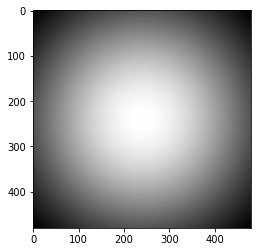

In [56]:

# generating vignette mask using Gaussian
# resultant_kernels
X_resultant_kernel = cv2.getGaussianKernel(cols,200)
Y_resultant_kernel = cv2.getGaussianKernel(rows,200)
	
#generating resultant_kernel matrix
resultant_kernel = Y_resultant_kernel * X_resultant_kernel.T
	
#creating mask and normalising by using np.linalg
# function
mask = 255 * resultant_kernel / np.linalg.norm(resultant_kernel)

plt.imshow(mask, 'gray')

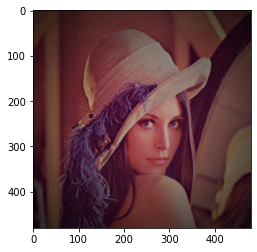

In [57]:
im_vin = np.copy(input_image)
	
# applying the mask to each channel in the input image
for i in range(3):
	im_vin[:,:,i] = im_vin[:,:,i] * mask
		
#displaying the original image
#cv2.imshow('Original', input_image)
plt.imshow(im_vin)


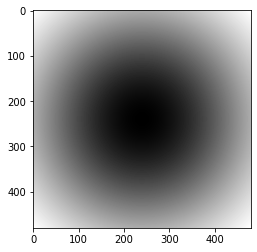

In [77]:
mask2 = 1 - (mask+0.01)
plt.imshow(mask2, 'gray')


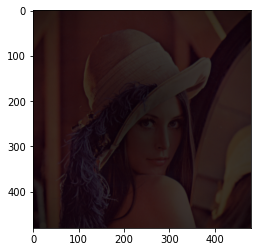

In [78]:
im_vin_filtered = np.copy(im_vin)

# applying the mask to each channel in the input image
for i in range(3):
	im_vin_filtered[:,:,i] = im_vin_filtered[:,:,i] * mask2

plt.imshow(im_vin_filtered)



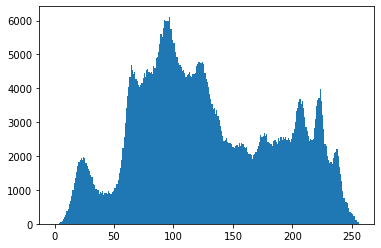

In [61]:
plt.hist(input_image.ravel(),256,[0,256]); plt.show()

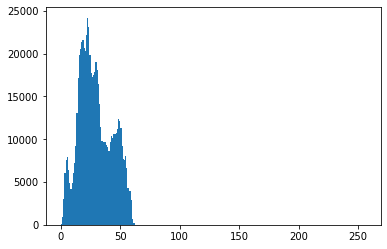

In [62]:
plt.hist(im_vin_filtered.ravel(),256,[0,256]); plt.show()

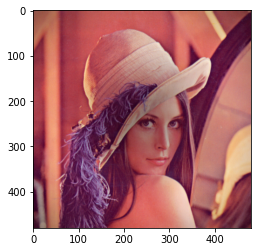

In [79]:
norm_img1 = cv2.normalize(im_vin_filtered, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
# scale to uint8
img_stretch_cv = (255*norm_img1).astype(np.uint8)
# show resulting image
plt.imshow(img_stretch_cv, 'gray')

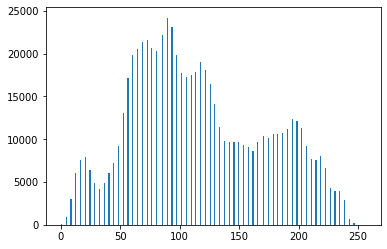

In [64]:
plt.hist(img_stretch_cv.ravel(),256,[0,256]); plt.show()

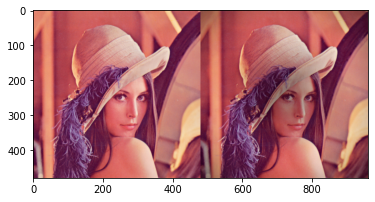

In [65]:
frame = cv2.hconcat((input_image, img_stretch_cv))
plt.imshow(frame)


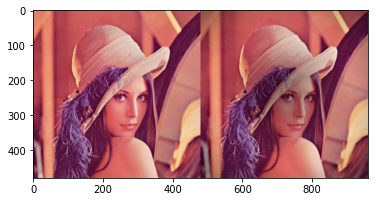

In [66]:
norm_img2 = cv2.normalize(input_image, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
# scale to uint8
img2_stretch_cv = (255*norm_img2).astype(np.uint8)

frame = cv2.hconcat((img2_stretch_cv, img_stretch_cv))
plt.imshow(frame, 'gray')



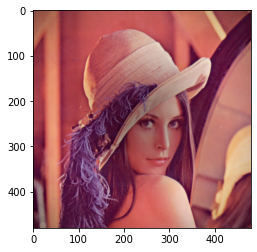

In [74]:
hsv = cv2.cvtColor(im_vin_filtered, cv2.COLOR_BGR2HSV)
hsv = np.array(hsv, dtype = np.float64)
#hsv[:,:,1] = hsv[:,:,1]*1.3 ## scale pixel values up or down for channel 1(Lightness)
#hsv[:,:,1][hsv[:,:,1]>255]  = 255
#hsv[:,:,2] = hsv[:,:,2]*1.3 ## scale pixel values up or down for channel 1(Lightness)
#hsv[:,:,2][hsv[:,:,2]>255]  = 255

hsv[:,:,2] = hsv[:,:,2]*4
hsv[:,:,2][hsv[:,:,2]>255]  = 255
hsv = np.array(hsv, dtype = np.uint8)
test = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)

plt.imshow(test)


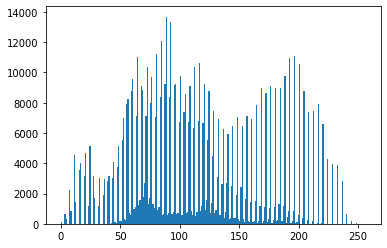

In [75]:
plt.hist(test.ravel(),256,[0,256]); plt.show()

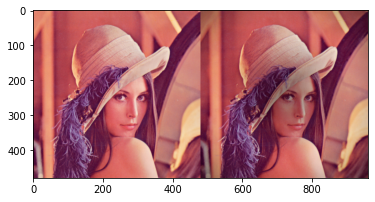

In [76]:
frame = cv2.hconcat((input_image, test))
plt.imshow(frame, 'gray')

